# Project

#### Hotel Booking Cancellation Prediction

**Goal**: The goal of the project is to predict whether the hotel booking is cancelled or not, based on the available features.

Building classification machine learning model to predict cancellation, that has accuracy score around 0.75 - 0.9

### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Load the Data

In [2]:
 #Creating the dataframe
df = pd.read_csv("hotel_bookings.csv")

In [3]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [4]:
#Looking for the 1st five records
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Getting the shape of the dataframe i.e. number of rows and columns present in the dataframe
df.shape

(119390, 32)

In [6]:
# Getting all the statistical information about the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#L:ooking for the columns info (Nulltype, Datatype, names of columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Getting all the numerical columns names in a dataframe
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [9]:
#Getting all the categorical columns names in a dataframe
df.select_dtypes(include=['object']).columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Details of Data (Feature Details)

In [11]:
details = pd.read_excel('E:\Learn\Data S\Hotel Features.xlsx')
details

,Feature Names,Description,Data Type
0,hotel,Type of Hotel i.e. city or resort hotel,object
1,is_cancelled,Booking cancelled (1) or not (0),Integer
2,lead_time,Number of days between the entering date of th...,Integer
3,arrival_date_year,Year of arrival date,Integer
4,arrival_date_month,Month of arrival date,Object
5,arrival_date_week_number,Week Number of arrival date,Integer
6,arrival_date_day_of_month,Date of the arrival,Integer
7,stays_in_weekend_nights,Number of weekend nights (Saturday or Sunday) ...,Integer
8,adults,Number of Adults,Integer
9,children,Number of Children,Float


<font size="2.2">Our target, is_cancelled, which is of type int64 and appears to have a value in the range 0-1, where 1 indicates a canceled hotel booking

In [12]:
categorical_columns = list(df.select_dtypes(include='object').columns)
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [13]:
#Printing All the value counts of categorical columns
for col in categorical_columns:
    print(f'''Value count of column {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count of column hotel:
--------------------------------------------------
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Value count of column arrival_date_month:
--------------------------------------------------
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Value count of column meal:
--------------------------------------------------
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Value count of column country:
--------------------------------------------------
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      99

In [14]:
df_new = df.copy()

##  Data Preprocessing

<font size="2.2">Let's Find the Missing Data

In [15]:
n = pd.DataFrame({'Rows Count': df_new.isnull().sum(), 'Percentage': df_new.isnull().sum()/df_new.shape[0]*100})
n[n['Rows Count']>0]

,Rows Count,Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


<font size="2.2">There are only four columns which are having missing values

<font size="2.2">1) Here it is observed that column company has 94% data missing, so we can drop that column  
    2) Country columns has majority of the values as PRT (i.e mode), so missing values can be replaced by PRT   
    3) Children columns has only 4 rows of data missing wo we can drop that four rows  
    4) For Agent column either we can fill the missing value by median or simply we can change the values to 0 (having Code or ID) and 1 (not having code)

In [16]:
# df.groupby('is_canceled').agg({'lead_time': ['count', 'mean']})

In [17]:
#Dropping the company column
df_new.drop(columns='company', inplace=True)

In [18]:
#Dropping only rows of chidlren column having missing values
df_new.dropna(subset=['children'], inplace=True)

In [19]:
#Changing value of agent to 0 and 1
df_new['agent'] = df_new['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_new['agent'].value_counts()

1    103048
0     16338
Name: agent, dtype: int64

In [20]:
#Fill NaN value in country with the value of mode
df_new['country'].fillna(df['country'].mode()[0] , inplace=True)

In [21]:
df_new.isnull().sum().sum()

0

It is obsereved that some of the columns are having inproper datatype, so we need to adjust them

In [22]:
df_new.reservation_status_date.min() #Let us assume that the 1st booking starts from this date

'2014-10-17'

In [23]:
# Changing children to integer type: 
df_new['children'] = df_new['children'].astype(int)

# Changing agent to integer type: 
df_new['agent'] = df_new['agent'].astype(int)

# Changing reservation status date to datetime type:
df_new['reservation_status_date'] = pd.to_datetime(df_new['reservation_status_date'])

reference_date = pd.to_datetime('2014-10-17')
df_new['reservation_status_date'] = (df_new['reservation_status_date'] - reference_date).dt.days

Number of  bookings are cancelled for the average lead time of 144days

In [24]:
cancelled_bookings = df_new.groupby('is_canceled').agg({'lead_time': ['count', 'mean']})

# Retrieving the count and mean lead time for canceled bookings
cancelled_count = cancelled_bookings.loc[1, ('lead_time', 'count')]
cancelled_mean_lead_time = cancelled_bookings.loc[1, ('lead_time', 'mean')]
cancelled_count, cancelled_mean_lead_time

(44220, 144.86164631388513)

In [25]:
df_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,0.863150,2.321227,101.833541,0.062520,0.571340,652.029300
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,0.343691,17.595011,50.534664,0.245295,0.792798,229.232734
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.290000,0.000000,0.000000,473.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.590000,0.000000,0.000000,660.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,126.000000,0.000000,1.000000,845.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,1.000000,391.000000,5400.000000,8.000000,5.000000,1063.000000


Again redefining numerical and categorical columns

In [26]:
#Numeric
numerical = df_new.select_dtypes(include=['int' , 'float']).keys()
numerical

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date'],
      dtype='object')

In [27]:
categorical = df.select_dtypes(include='object').keys()
categorical

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [28]:
df_new.describe(include='O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119386,119386,119386,119386,119386,119386,119386,119386,119386,119386,119386
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79326,13873,92306,49074,56476,97870,85994,74053,104637,89613,75166


### Boxplot

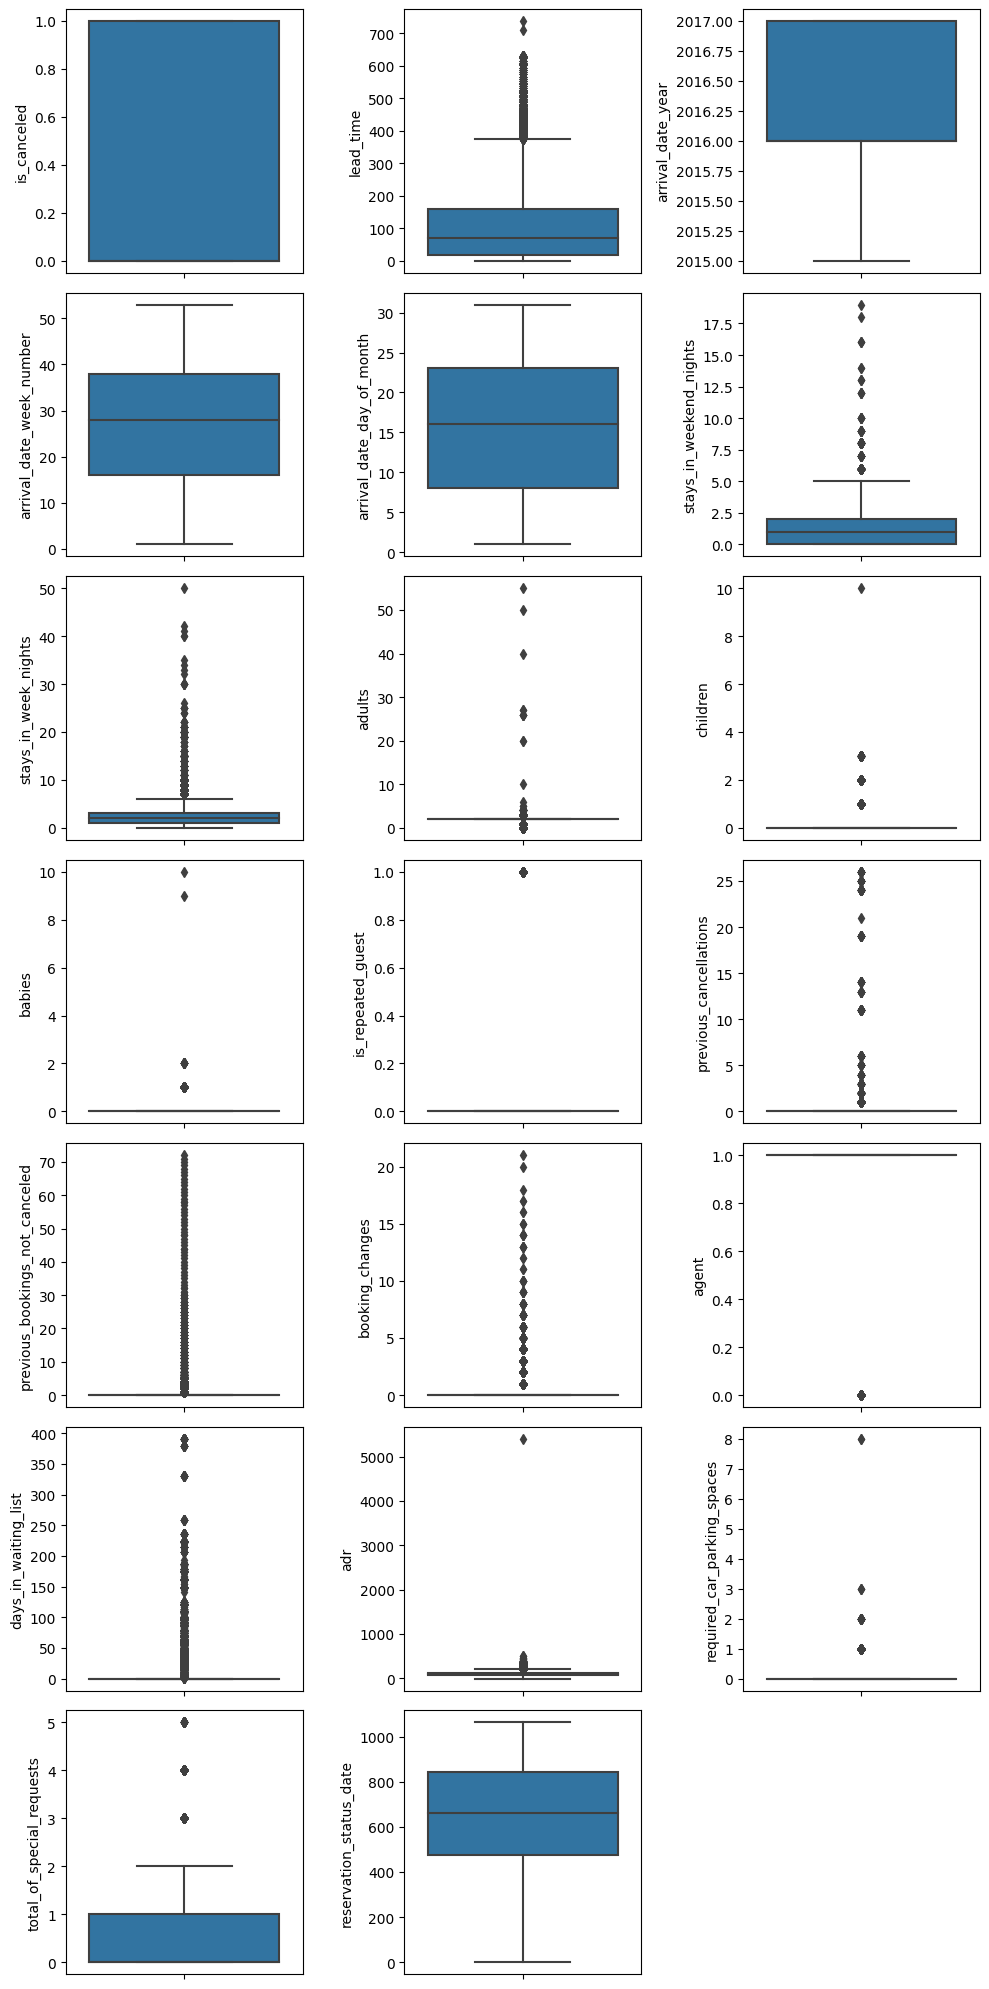

In [29]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(7,3, i+1)
    sns.boxplot(y=df_new[numerical[i]])
    plt.tight_layout()

From the boxplot visualization, it is observed that there are the presence of outliers:

1) Almost max numeric columns have outliers. But we will not remove these outliers as they are giving very useful infromation about the data.   
2) There is a very one distinct value in 'adr' column wo we can reomve that outlier.   
3) From the boxplot, it is observed that the most of the columns have a skewed distribution, except for the columns arrival_date_day_of_month, arrival_date_week_number

### Distribution Plot

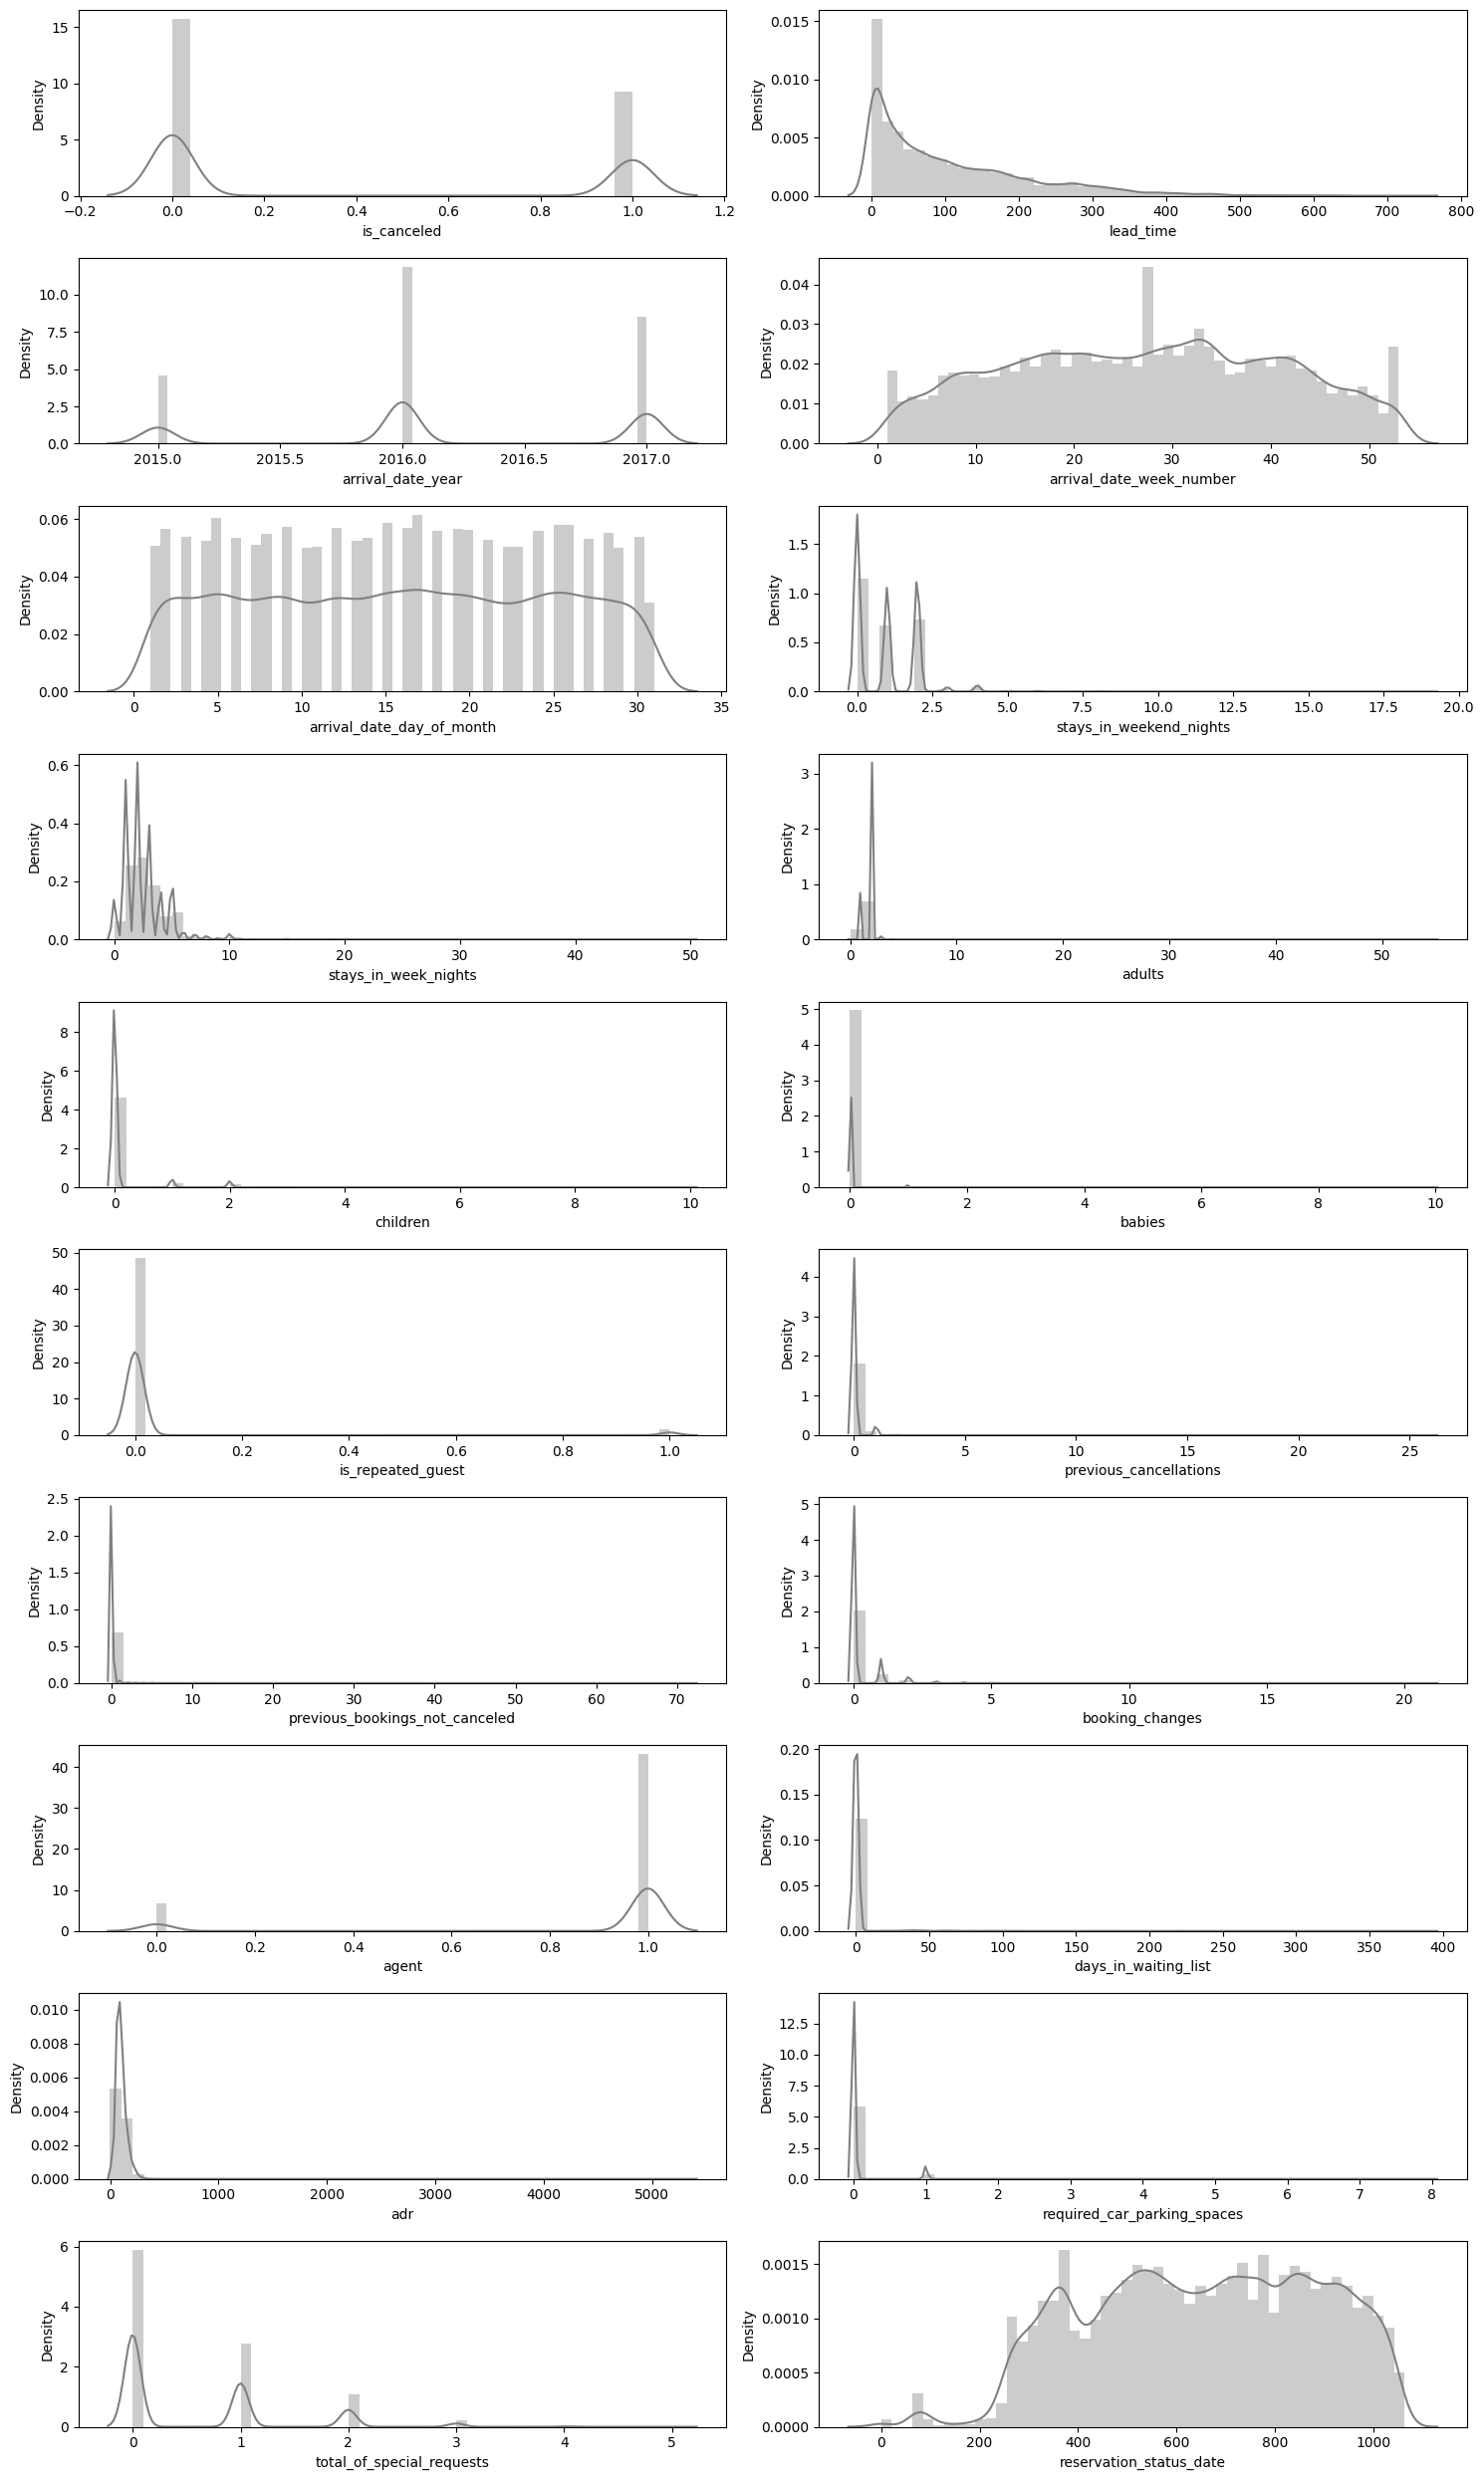

In [30]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numerical)):
    plt.subplot(10, 2, i+1)
    sns.distplot(df_new[numerical[i]], color='gray')
    plt.tight_layout()

From the distribution Plot, It is observed that most of the columns have skewed distribution.  

### Count Plot (Categorical Columns)

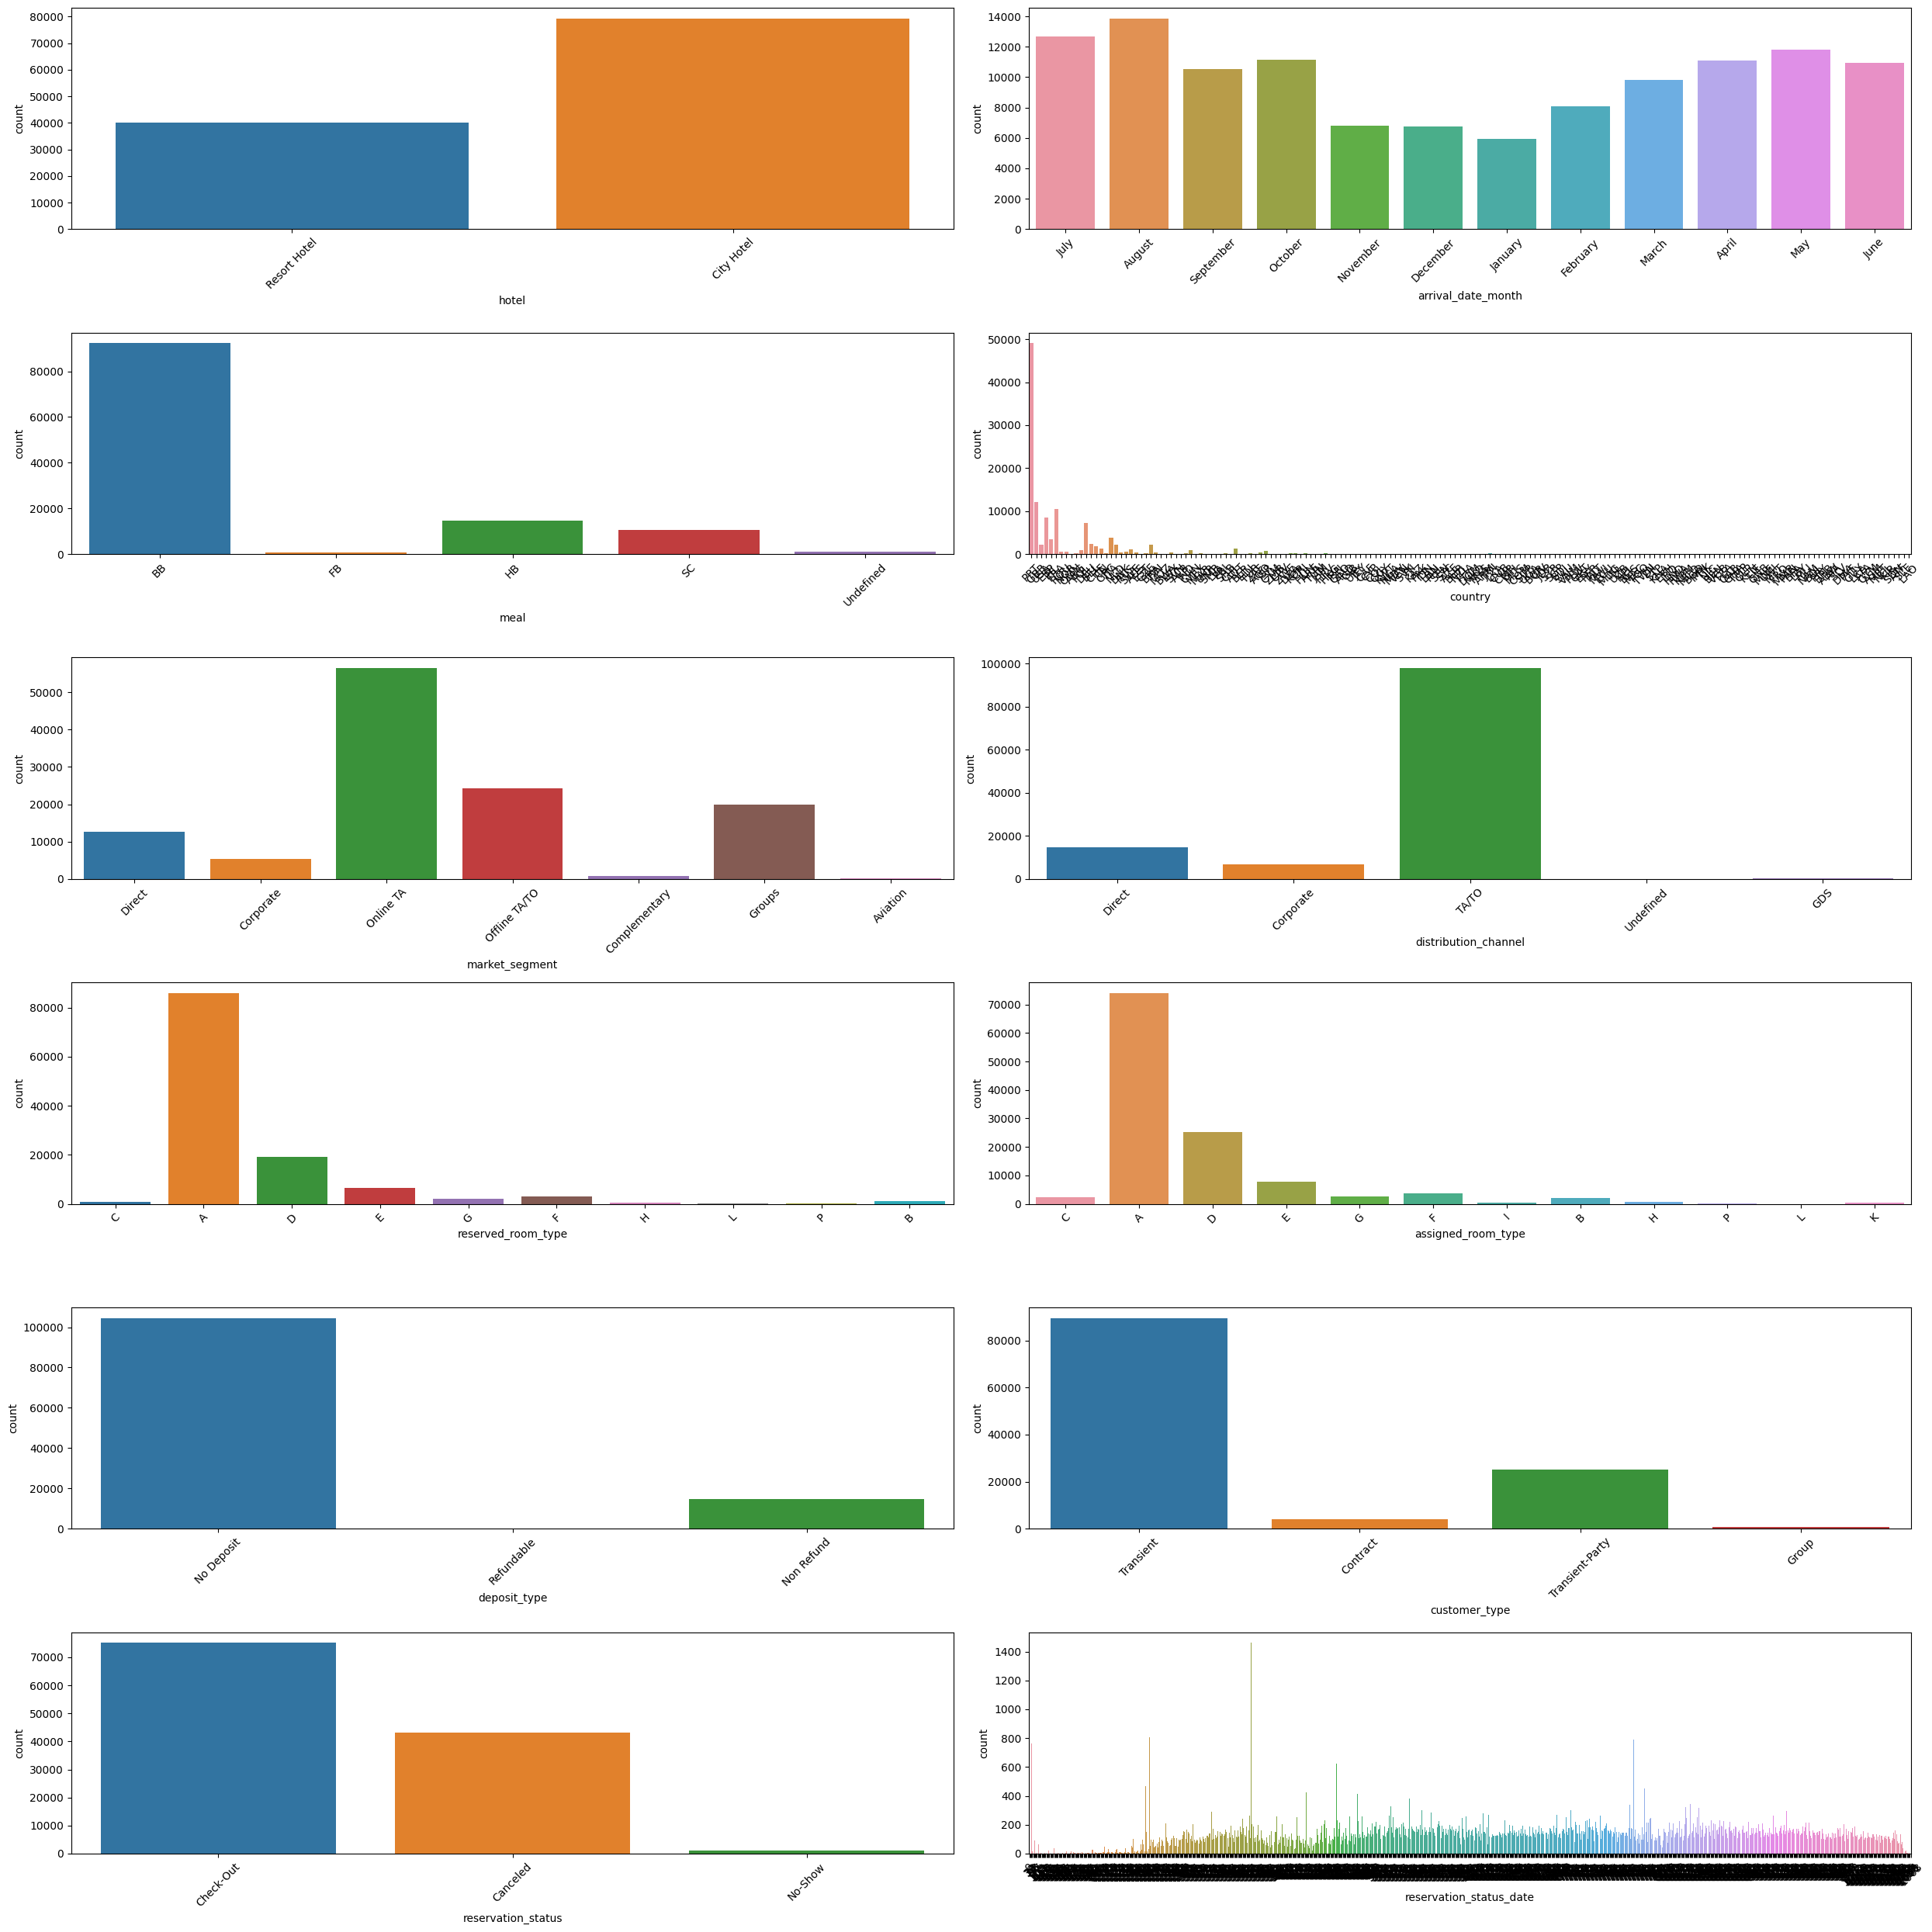

In [31]:
plt.figure(figsize=(25, 25))
for i in range(0, len(categorical)):
    plt.subplot(6,2, i+1)
    sns.countplot(df_new, x = categorical[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Following observations can be drawn from count plot:  
    1) Most of the hotel booking is for city hotels.      
    2) Most market segments come from Online Travel Agents   
    3) Most selected room types are A.   
    4) Most customers choose to book at hotels with the No Deposit type   
    5) Most of the booking are in month of July to Oct and in Summers  
    6) Most of the customers are from PRT.   
    

In [32]:
# plt.figure(figsize=(15, 15))
# sns.pairplot(df_new[numerical], diag_kind='kde')
# plt.show()

### Removing OLutlier in ADR column

In [33]:
df_new.drop(df_new[df_new['adr'] > 5000].index, inplace = True)

In [34]:
pd.set_option('display.max_rows', None)

### Normalization

In [35]:
norm = ['lead_time', 'stays_in_week_nights','stays_in_weekend_nights', 'adults', 'children', 'babies', \
        'days_in_waiting_list', 'total_of_special_requests', 'required_car_parking_spaces']

In [36]:
from sklearn.preprocessing import MinMaxScaler
for items in norm:
    df_new[items] = MinMaxScaler().fit_transform(df_new[items].values.reshape(len(df_new),1))

In [37]:
df_new.select_dtypes(include='object').keys()

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

### Converting Categorical Columns to Numerical

In a country column there are many different countries and doing on hot encoding will increase the number of columns. So here we can convert them into numbers from 1 to 15 to most value counts in that column and remaining to 0.

In [38]:
mapping = {'PRT':1, 'GBR':2, 'FRA':3, 'ESP':4, 'DEU':5, 'ITA':6, 'IRL':7, 'BEL':8, 'BRA':9,'NLD':10,'USA':11,'CHE':12,'CN':13, 
'AUT':14,'SWE':15}
df_new['country'] = df_new['country'].map(mapping).fillna(0).replace({pd.NA: 0})

In [39]:
df_new['hotel'] = df_new['hotel'].map({'City Hotel':0, 'Resort Hotel':1})

In [40]:
months ={'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df_new['arrival_date_month'] = df_new['arrival_date_month'].map(months)

In [41]:
df_new['reservation_status'] = df_new['reservation_status'].map({'Canceled':0, 'Check-Out':1, 'No-Show':2 })

#### One Hot Encoding

In [42]:
encode = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type']

In [43]:
for cat in encode:
    onehotencoding = pd.get_dummies(df_new[cat], prefix=cat)
    df_new = df_new.join(onehotencoding)

In [44]:
df_new.drop(encode, axis=1, inplace=True)

In [45]:
df_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,0.464043,2015,7,27,1,0.0,0.00,0.036364,0.0,0.0,1.0,0,0,0,3,0,0.0,0.0,0.0,0.0,1,257,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1.000000,2015,7,27,1,0.0,0.00,0.036364,0.0,0.0,1.0,0,0,0,4,0,0.0,0.0,0.0,0.0,1,257,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0.009498,2015,7,27,1,0.0,0.02,0.018182,0.0,0.0,2.0,0,0,0,0,0,0.0,75.0,0.0,0.0,1,258,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0.017639,2015,7,27,1,0.0,0.02,0.018182,0.0,0.0,2.0,0,0,0,0,1,0.0,75.0,0.0,0.0,1,258,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0.018996,2015,7,27,1,0.0,0.04,0.036364,0.0,0.0,2.0,0,0,0,0,1,0.0,98.0,0.0,0.2,1,259,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Setting up Train Test Split

In [47]:
x = df_new.drop(columns='is_canceled', axis=1)
y = df_new.is_canceled

In [48]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Modelling

### Selection of Model using cross val score

In [49]:
# def get_sco(clas, x_train,y_train ):
#     scores = []
#     for items in clas:
#         cvs = {items: cross_val_score(items, x_train,y_train, cv=4 )}
#         scores.append(cvs)
#     return scores
def get_score(clas, x_train,y_train ):
    scores = []
    for items in clas:
        cvs = {items: (cross_val_score(items, x_train,y_train, cv=4 )).mean()}
        scores.append(cvs)
    return scores

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [51]:
cross_val_score(RandomForestClassifier(), x,y, cv=4 ).mean()

0.986748687656374

In [52]:
cross_val_score(LogisticRegression(), x,y, cv=4 ).mean()

0.916580560826711

In [53]:
cross_val_score(KNeighborsClassifier(), x,y, cv=4 ).mean()

0.7969843180833835

In [54]:
# cross_val_score(svm.SVC(kernel='rbf'), x,y, cv=4 ).mean()  (Taking too much time to run thats why comment out)

In [55]:
# cross_val_score(svm.SVC(kernel='poly'), x,y, cv=4 ).mean()

In [56]:
# classifiers = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), svm.SVC(kernel='rbf')]
# get_score(classifiers,x,y)   (Taking too much time to run thats why comment out)

#### From The Cross Val Score of three different classifiers, RandomForestClasifier() has given 99% score. and Logistic Regression has 91.6%.

#### Using RandomForestClassifier()

In [57]:
#Training the Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
#Predictions
y_pred = rf_model.predict(x_test)

In [91]:
y_pred[:5] #Printing 1st five predicted records

array([1, 1, 0, 1, 0], dtype=int64)

In [92]:
y_test[:5]  #Printing 1st five test records

53320     1
11985     1
91514     0
7215      1
113967    0
Name: is_canceled, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.999553272280545

Defining functions to get classification report and confusion matrix

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

def eval_classification(pred, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1)
    plt.figure(figsize=(6,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

In [101]:
eval_classification(y_pred,y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00


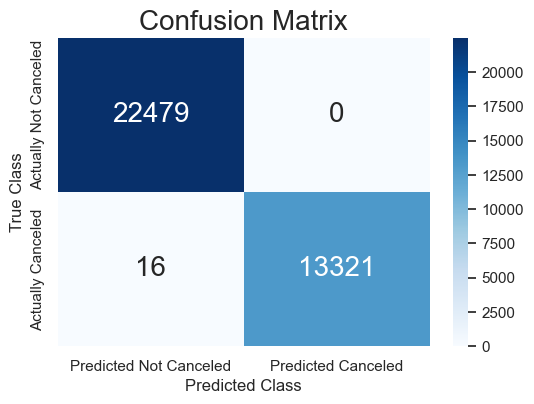

In [89]:
show_cmatrix(y_test, y_pred)

In [70]:
y_train[6:8]

71692    1
33633    0
Name: is_canceled, dtype: int64

#### Using LogisticRegression()

In [106]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train) # training the model

y_pred_lr = lr_model.predict(x_test) #Predictions

In [107]:
eval_classification(y_pred_lr,y_test)

Accuracy (Test Set): 0.98
Precision (Test Set): 1.00
Recall (Test Set): 0.95
F1-Score (Test Set): 0.97


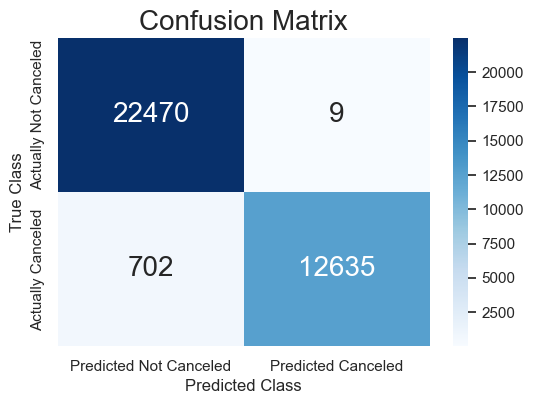

In [110]:
show_cmatrix(y_test,y_pred_lr)

### Conclusions

1) From the eval_classification report, Random forest has the best performance but the model looks like in overfit category.   
2) The Other best suitable model found is LogisticRegression() with accuracy_score of 91%.   
3) Logistic Regression model allows hotels to estimate their occupancy rates more measurably, manage their business appropriately, and further increase their revenue.

Looking at the confusion matrix, the risks of this model are as follows:
* 0.025% chance that the hotel does not suspect guests, there is a risk of overbooking.
* 1.96% chance of a hotel allocating their resources to a reservation that will go wrong (cancelled booking)

### THE END ###